# PDF Highlighting Demo

### After you've trained the model in the app, you can use Indico's API to create a pipeline to predict on new documents and use positional coordinates to apply highlights to the source document. 

In [2]:
from pprint import pprint
from example_pipeline import get_client, ocr_pdf_document, get_predictions
from highlighter import OnDoc, Highlighter, print_color_map
from wand.image import Image as WImage
from ast import literal_eval
import pandas as pd
import os
import json

df = pd.read_csv("export.csv")
print(df.columns)


3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]

PyMuPDF 1.17.3: Python bindings for the MuPDF 1.17.0 library.
Version date: 2020-07-06 15:07:04.
Built for Python 3.6 on linux (64-bit).

['GRAY52', 'FIREBRICK', 'BLANCHEDALMOND', 'GRAY', 'GRAY57', 'FIREBRICK3', 'MAGENTA2', 'MISTYROSE1', 'CADETBLUE4', 'LIGHTSLATEGRAY', 'PEACHPUFF2', 'IVORY1', 'INDIANRED4', 'PALEVIOLETRED2', 'TOMATO1', 'TOMATO', 'GOLDENROD2', 'DARKVIOLET', 'AQUAMARINE', 'CADETBLUE3', 'ORANGE3', 'GRAY21', 'GAINSBORO', 'TURQUOISE3', 'WHITE', 'MEDIUMVIOLETRED', 'GRAY34', 'NAVAJOWHITE1', 'GRAY12']
Index(['data', 'filename', 'label', 'row_id', 'row_index'], dtype='object')


In [3]:
TOKEN_PATH = './indico_api_token.txt'
HOST = 'app.indico.io'
CLIENT = get_client(host=HOST, api_token_path=TOKEN_PATH)
DATA_DIR = './data'
LABEL_COLUMN = 'label'
TEXT_COLUMN = 'data'
MODEL_ID = 30986
USER_ID = 13187
COLOR_MAP = {'account': 'GRAY18', 'amount_balance_forward': 'GRAY36', 'asset_equipment': 'PERU', 'asset_material': 'MAGENTA', 'client_address': 'PALEGREEN1', 'client_id': 'GRAY21', 'client_location': 'ORCHID2', 'client_name': 'CHARTREUSE4', 'hauler_address': 'OLIVEDRAB3', 'hauler_email': 'GRAY0', 'hauler_id': 'ANTIQUEWHITE2', 'hauler_name': 'PALEVIOLETRED1', 'hauler_phone': 'MEDIUMORCHID', 'hauler_website': 'ROYALBLUE1', 'invoice_date': 'HONEYDEW2', 'invoice_due_date': 'KHAKI', 'invoice_number': 'SEAGREEN1', 'invoice_page': 'DARKORCHID', 'invoice_term': 'DARKMAGENTA', 'invoice_total': 'LEMONCHIFFON2', 'line_detail': 'CHOCOLATE1', 'line_quantity': 'LIGHTSKYBLUE4', 'line_rate': 'CYAN4', 'line_total': 'ROYALBLUE', 'remit_address': 'GOLD4', 'remit_to': 'FIREBRICK1', 'service_period': 'PALEGREEN3', 'work_order_number': 'GRAY41', 'work_order_tonnage': 'GRAY57'}


In [4]:
print_color_map(COLOR_MAP, output_file="color_map.pdf")

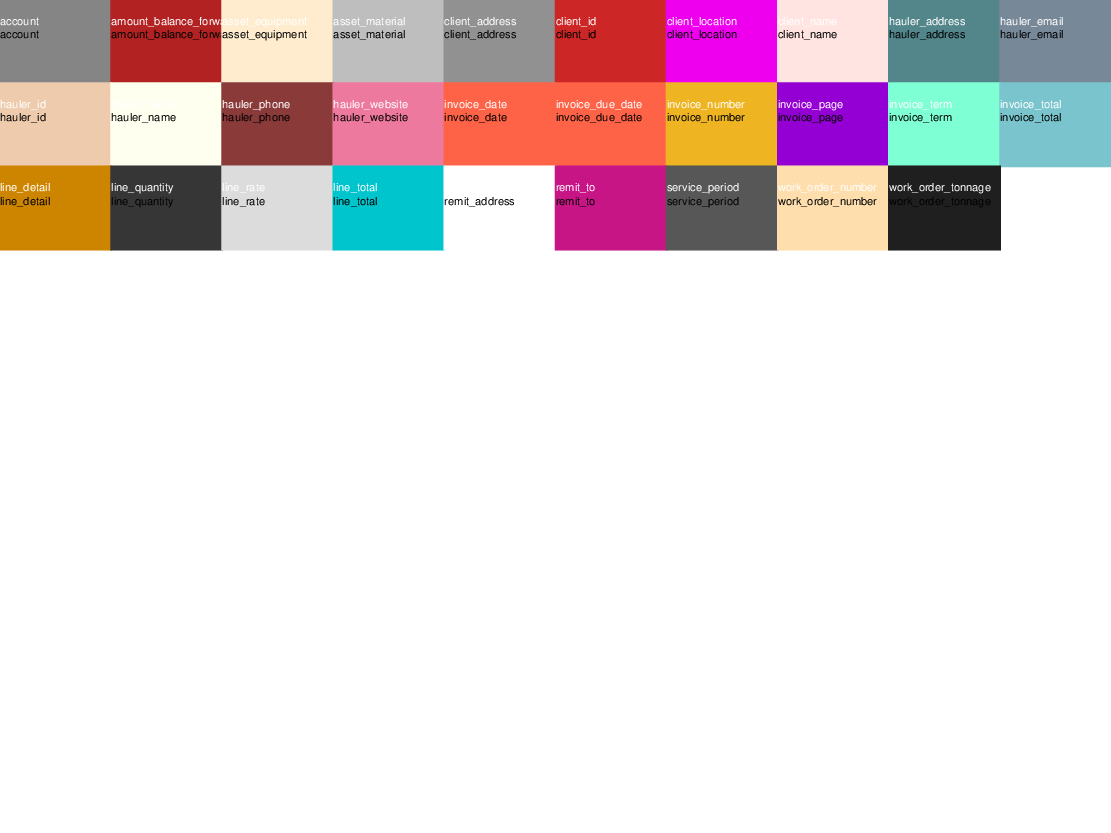

In [5]:
img = WImage(filename="color_map.pdf", resolution=100)
img

In [ ]:

for row_idx in range(len(df)):
    PDF_NAME = df.filename[row_idx]
    PDF_PATH = os.path.join(DATA_DIR, PDF_NAME)
    OUTPUT_PATH = os.path.splitext(PDF_PATH)[0] + "_with_labels.pdf"
    ocr_result = ocr_pdf_document(CLIENT, pdf_path=PDF_PATH)
    text = df[TEXT_COLUMN][row_idx]
    labels = literal_eval(df[LABEL_COLUMN][row_idx])
    for label in labels:
        label['text'] = text[label['start']:label['end']]
    highlight = Highlighter(ocr_result)
    highlight.collect_positions([labels])
    highlight.highlight_pdf(PDF_PATH, OUTPUT_PATH, color_map=COLOR_MAP)